In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2

DATA_FOLDER = './'
TRAIN_SAMPLE_FOLDER = 'train_sample_videos'
TEST_FOLDER = 'test_videos'
FACE_DETECTION_FOLDER = 'haar-cascades-for-face-detection'

train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))
json_file = [file for file in train_list if  file.endswith('json')][0]

def get_meta_from_json(path):
    df = pd.read_json(os.path.join(DATA_FOLDER, path, json_file))
    df = df.T
    return df

meta_train_df = get_meta_from_json(TRAIN_SAMPLE_FOLDER)
meta_train_df.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [2]:
meta_train_df

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4
...,...,...,...
etejaapnxh.mp4,FAKE,train,wtreibcmgm.mp4
etmcruaihe.mp4,FAKE,train,afoovlsmtx.mp4
etohcvnzbj.mp4,FAKE,train,bdnaqemxmr.mp4
eudeqjhdfd.mp4,REAL,train,None


In [2]:
fake_train_sample_video = list(meta_train_df.loc[meta_train_df.label=='FAKE'].index)
fake_train_sample_video

['aagfhgtpmv.mp4',
 'aapnvogymq.mp4',
 'abofeumbvv.mp4',
 'abqwwspghj.mp4',
 'acifjvzvpm.mp4',
 'acqfdwsrhi.mp4',
 'acxnxvbsxk.mp4',
 'acxwigylke.mp4',
 'aczrgyricp.mp4',
 'adhsbajydo.mp4',
 'adohikbdaz.mp4',
 'adylbeequz.mp4',
 'aelzhcnwgf.mp4',
 'aettqgevhz.mp4',
 'aevrfsexku.mp4',
 'agdkmztvby.mp4',
 'agqphdxmwt.mp4',
 'ahbweevwpv.mp4',
 'ahdbuwqxit.mp4',
 'ahfazfbntc.mp4',
 'aipfdnwpoo.mp4',
 'ajwpjhrbcv.mp4',
 'aklqzsddfl.mp4',
 'aknbdpmgua.mp4',
 'aknmpoonls.mp4',
 'akvmwkdyuv.mp4',
 'akxoopqjqz.mp4',
 'akzbnazxtz.mp4',
 'aladcziidp.mp4',
 'alaijyygdv.mp4',
 'alninxcyhg.mp4',
 'altziddtxi.mp4',
 'alvgwypubw.mp4',
 'amaivqofda.mp4',
 'amowujxmzc.mp4',
 'andaxzscny.mp4',
 'aneclqfpbt.mp4',
 'aorjvbyxhw.mp4',
 'apatcsqejh.mp4',
 'apgjqzkoma.mp4',
 'apogckdfrz.mp4',
 'aqpnvjhuzw.mp4',
 'arkroixhey.mp4',
 'arlmiizoob.mp4',
 'arrhsnjqku.mp4',
 'asdpeebotb.mp4',
 'aslsvlvpth.mp4',
 'asmpfjfzif.mp4',
 'asvcrfdpnq.mp4',
 'atxvxouljq.mp4',
 'atyntldecu.mp4',
 'atzdznmder.mp4',
 'aufmsmnoye

In [3]:
real_train_sample_video = list(meta_train_df.loc[meta_train_df.label=='REAL'].index)
real_train_sample_video

['abarnvbtwb.mp4',
 'aelfnikyqj.mp4',
 'afoovlsmtx.mp4',
 'agrmhtjdlk.mp4',
 'ahqqqilsxt.mp4',
 'ajqslcypsw.mp4',
 'anpuvshzoo.mp4',
 'asaxgevnnp.mp4',
 'atkdltyyen.mp4',
 'atvmxvwyns.mp4',
 'avmjormvsx.mp4',
 'axntxmycwd.mp4',
 'aybgughjxh.mp4',
 'aybumesmpk.mp4',
 'aytzyidmgs.mp4',
 'bddjdhzfze.mp4',
 'bdnaqemxmr.mp4',
 'beboztfcme.mp4',
 'bejhvclboh.mp4',
 'beyebyhrph.mp4',
 'bffwsjxghk.mp4',
 'bgvhtpzknn.mp4',
 'bgwmmujlmc.mp4',
 'bilnggbxgu.mp4',
 'bmjzrlszhi.mp4',
 'bpapbctoao.mp4',
 'brwrlczjvi.mp4',
 'bulkxhhknf.mp4',
 'bwhlgysghg.mp4',
 'bwipwzzxxu.mp4',
 'bxzakyopjf.mp4',
 'bzythlfnhq.mp4',
 'caifxvsozs.mp4',
 'ccfoszqabv.mp4',
 'cfxkpiweqt.mp4',
 'chtapglbcj.mp4',
 'chviwxsfhg.mp4',
 'ciyoudyhly.mp4',
 'cizlkenljw.mp4',
 'ckjaibzfxa.mp4',
 'ckkuyewywx.mp4',
 'clrycekyst.mp4',
 'cmbzllswnl.mp4',
 'cobjrlugvp.mp4',
 'cpjxareypw.mp4',
 'cppdvdejkc.mp4',
 'cprhtltsjp.mp4',
 'crezycjqyk.mp4',
 'cyxlcuyznd.mp4',
 'dakiztgtnw.mp4',
 'dbnygxtwek.mp4',
 'dbtbbhakdv.mp4',
 'ddepeddixj

In [4]:
def display_image_from_video_list(video_path_list, video_folder=TRAIN_SAMPLE_FOLDER):

    plt.figure()
    fig, ax = plt.subplots(2,3,figsize=(16,8))

    for i, video_file in enumerate(video_path_list[0:6]):
        video_path = os.path.join(DATA_FOLDER, video_folder,video_file)
        capture_image = cv2.VideoCapture(video_path) 
        ret, frame = capture_image.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax[i//3, i%3].imshow(frame)
        ax[i//3, i%3].set_title(f"Video: {video_file}")
        ax[i//3, i%3].axis('on')

<Figure size 432x288 with 0 Axes>

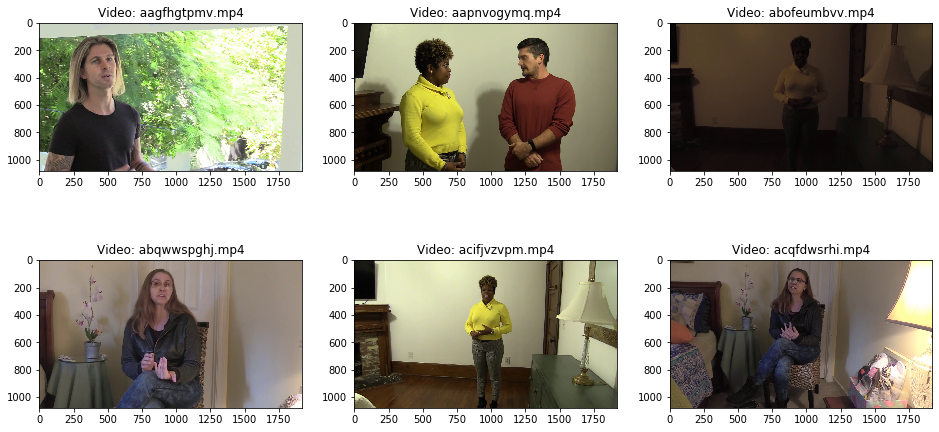

In [5]:
display_image_from_video_list(fake_train_sample_video)

In [6]:
class ObjectDetector():

    def __init__(self,object_cascade_path):

        self.objectCascade=cv2.CascadeClassifier(object_cascade_path)


    def detect(self, image, scale_factor=1.3,
               min_neighbors=5,
               min_size=(20,20)):

        rects=self.objectCascade.detectMultiScale(image,
                                                scaleFactor=scale_factor,
                                                minNeighbors=min_neighbors,
                                                minSize=min_size)
        return rects

In [7]:

def extract_video(video, root_dir):
    video_path = os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER,video)
    capture = cv2.VideoCapture(video_path)
    frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    randomframe = random.sample(range(frames_num), 5)
    for i in range(frames_num):
        capture.grab()
        success, frame = capture.retrieve()
        if not success:
            continue
        if(i in randomframe):
            detected = detect_objects(image=frame, 
                scale_factor=1.3, 
                min_neighbors=5, 
                min_size=(50, 50))  
            id = os.path.splitext(os.path.basename(video))[0]
            for idx, face in enumerate(detected):
                cv2.imwrite(os.path.join(root_dir, "jpegs", "{}_{}_{}.jpg".format(id, i, idx)), face, [cv2.IMWRITE_JPEG_QUALITY, 100])
            
            
def detect_objects(image, scale_factor, min_neighbors, min_size):

    profile_cascade_path= os.path.join(FACE_DETECTION_FOLDER,'haarcascade_profileface.xml')

    pd=ObjectDetector(profile_cascade_path)

    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    profiles=pd.detect(image_gray,
                   scale_factor=scale_factor,
                   min_neighbors=min_neighbors,
                   min_size=min_size)
    face_crop = []
    
    for x, y, w, h in profiles:
        face_crop.append(image_gray[y:y+h, x:x+w])

    return face_crop

In [8]:
root_dir = '\\train_sample_videos\\fake'
os.makedirs(os.path.join(root_dir, "jpegs"), exist_ok=True)
for video in fake_train_sample_video[:50]:
    extract_video(video,root_dir)


In [9]:
root_dir = '\\train_sample_videos\\real'
os.makedirs(os.path.join(root_dir, "jpegs"), exist_ok=True)
for video in real_train_sample_video[:50]:
    extract_video(video,root_dir)